In [1]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 

In [3]:
import numpy as np 


In [4]:
import matplotlib.pyplot as plt


In [5]:
import seaborn as sb 


In [6]:
from termcolor import colored as cl

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.linear_model import Ridge

In [10]:
from sklearn.linear_model import Lasso 

In [11]:
from sklearn.linear_model import BayesianRidge 

In [12]:
from sklearn.linear_model import ElasticNet

In [13]:
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2 

In [14]:
sb.set_style('whitegrid') 
plt.rcParams['figure.figsize'] = (20, 10) 

In [15]:
df = pd.read_csv('HOUSING DATASET.csv')

In [16]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,WoodDeckSF,OpenPorchSF,TotalBsmtSF,FloorSF,SalePrice
0,60,65.0,8450,7,0,61,856,104678.0,208500
1,20,80.0,9600,6,298,0,1262,91381.0,181500
2,60,68.0,11250,7,0,42,920,112210.0,223500
3,70,60.0,9550,7,0,35,756,70378.0,140000
4,60,84.0,14260,8,192,84,1145,125572.5,250000
...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,0,40,953,87976.5,175000
1456,20,85.0,13175,6,349,0,1542,105771.0,210000
1457,70,66.0,9042,7,0,60,1152,133826.0,266500
1458,20,68.0,9717,5,366,0,1078,71601.5,142125


In [17]:
df.dropna(inplace = True)

In [18]:
print(cl(df.isnull().sum(), attrs = ['bold']))

MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
WoodDeckSF     0
OpenPorchSF    0
TotalBsmtSF    0
FloorSF        0
SalePrice      0
dtype: int64


In [19]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,WoodDeckSF,OpenPorchSF,TotalBsmtSF,FloorSF,SalePrice
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,57.198168,70.049958,9951.698585,6.122398,89.288926,45.954205,1059.384679,90914.932556,180770.480433
std,43.106427,24.284752,7924.353975,1.419216,120.383224,66.078038,448.307125,41835.663560,83389.519866
min,20.000000,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,17810.000000,34900.000000
25%,20.000000,59.000000,7420.000000,5.000000,0.000000,0.000000,784.000000,64284.500000,127500.000000
50%,50.000000,69.000000,9262.000000,6.000000,0.000000,24.000000,990.000000,80095.000000,159500.000000
75%,70.000000,80.000000,11249.000000,7.000000,168.000000,66.000000,1309.000000,107426.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,857.000000,547.000000,6110.000000,378722.000000,755000.000000


In [20]:
print(cl(df.dtypes, attrs = ['bold']))

MSSubClass       int64
LotFrontage    float64
LotArea          int64
OverallQual      int64
WoodDeckSF       int64
OpenPorchSF      int64
TotalBsmtSF      int64
FloorSF        float64
SalePrice        int64
dtype: object


In [21]:
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors = 'coerce')
df['LotFrontage'] = df['LotFrontage'].astype('int64')

In [22]:
print(cl(df.dtypes, attrs = ['bold']))

MSSubClass       int64
LotFrontage      int64
LotArea          int64
OverallQual      int64
WoodDeckSF       int64
OpenPorchSF      int64
TotalBsmtSF      int64
FloorSF        float64
SalePrice        int64
dtype: object


In [23]:
df['FloorSF'] = pd.to_numeric(df['FloorSF'], errors = 'coerce')
df['FloorSF'] = df['FloorSF'].astype('int64')

In [24]:
print(cl(df.dtypes, attrs = ['bold']))

MSSubClass     int64
LotFrontage    int64
LotArea        int64
OverallQual    int64
WoodDeckSF     int64
OpenPorchSF    int64
TotalBsmtSF    int64
FloorSF        int64
SalePrice      int64
dtype: object


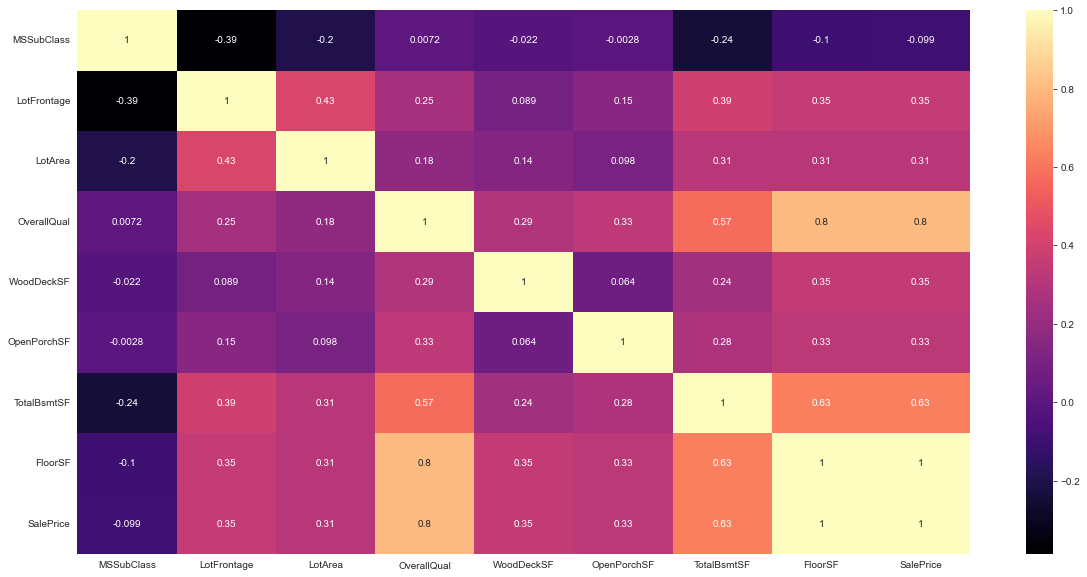

In [27]:
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


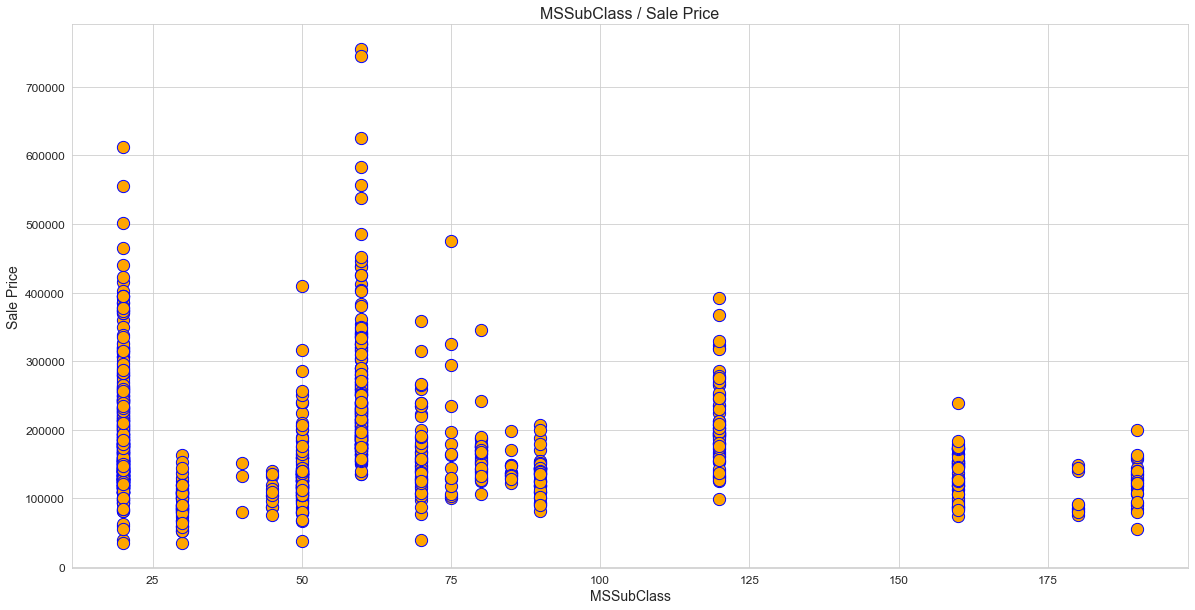

C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


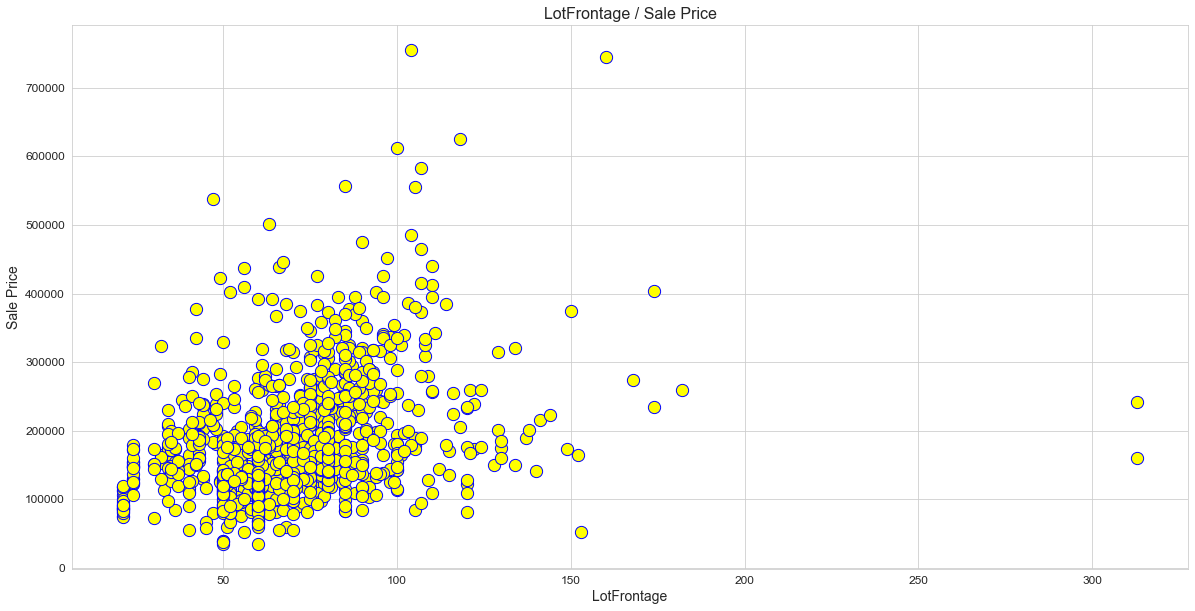

C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


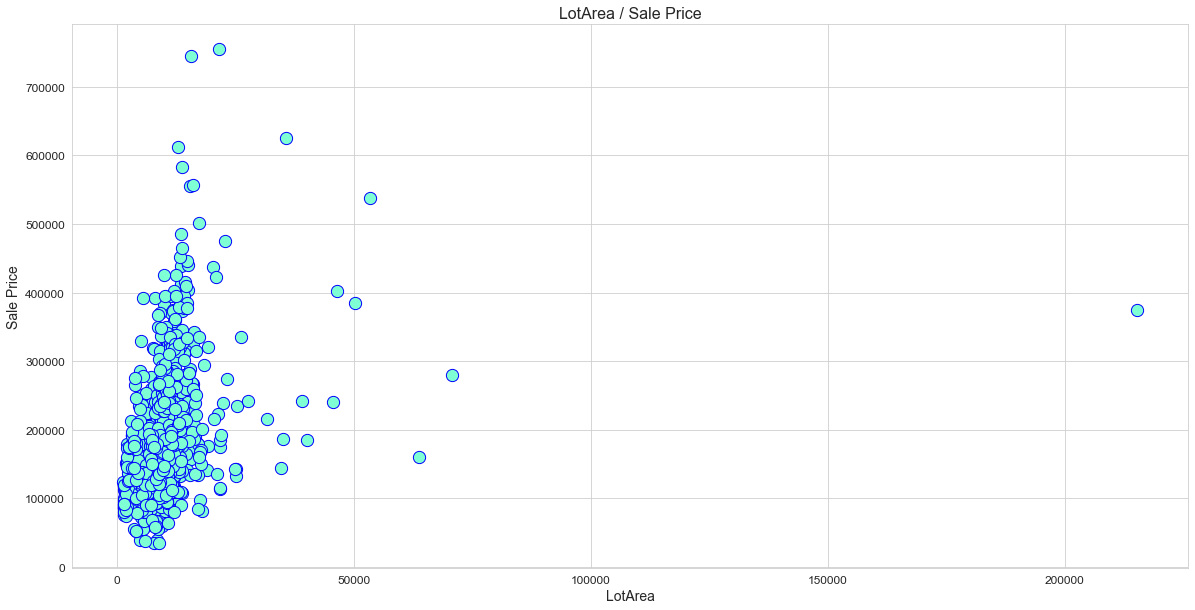

C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


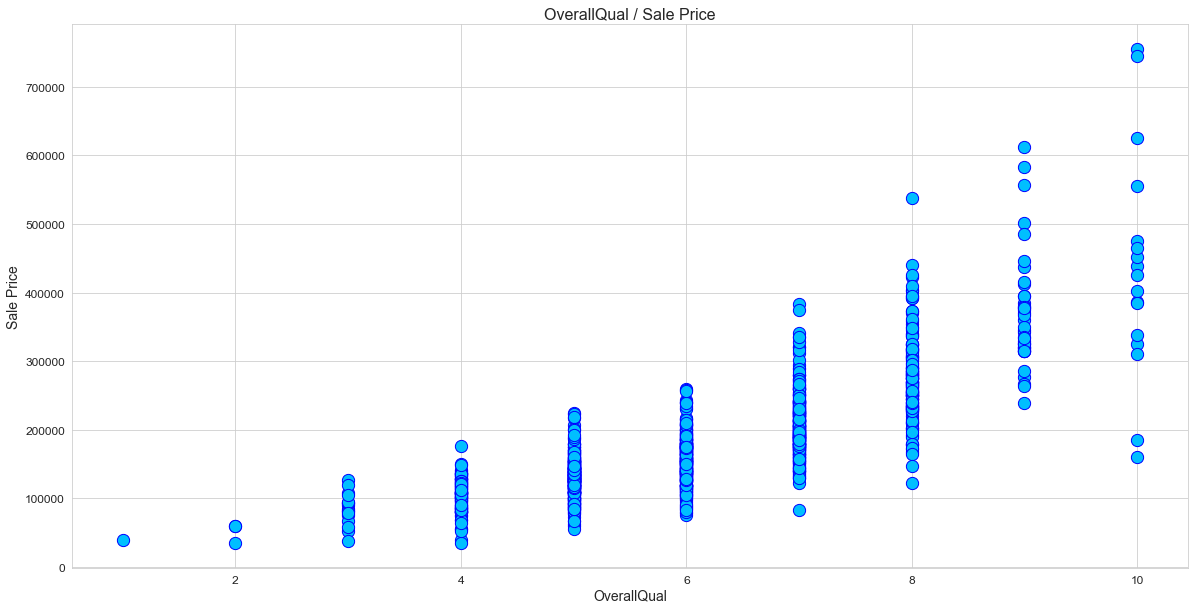

C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


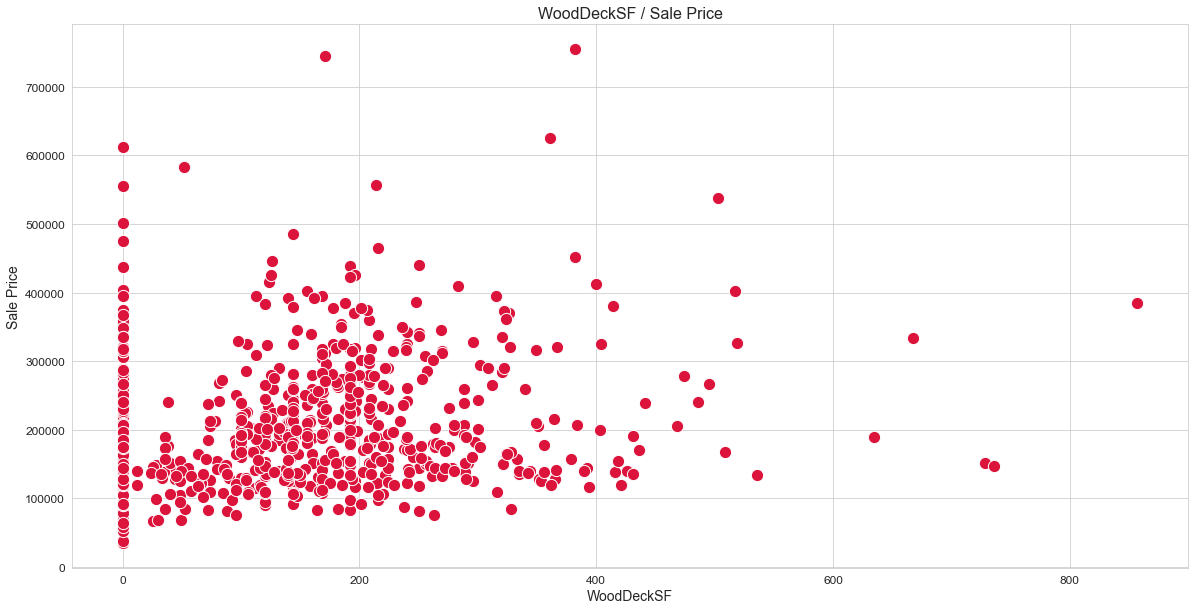

C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


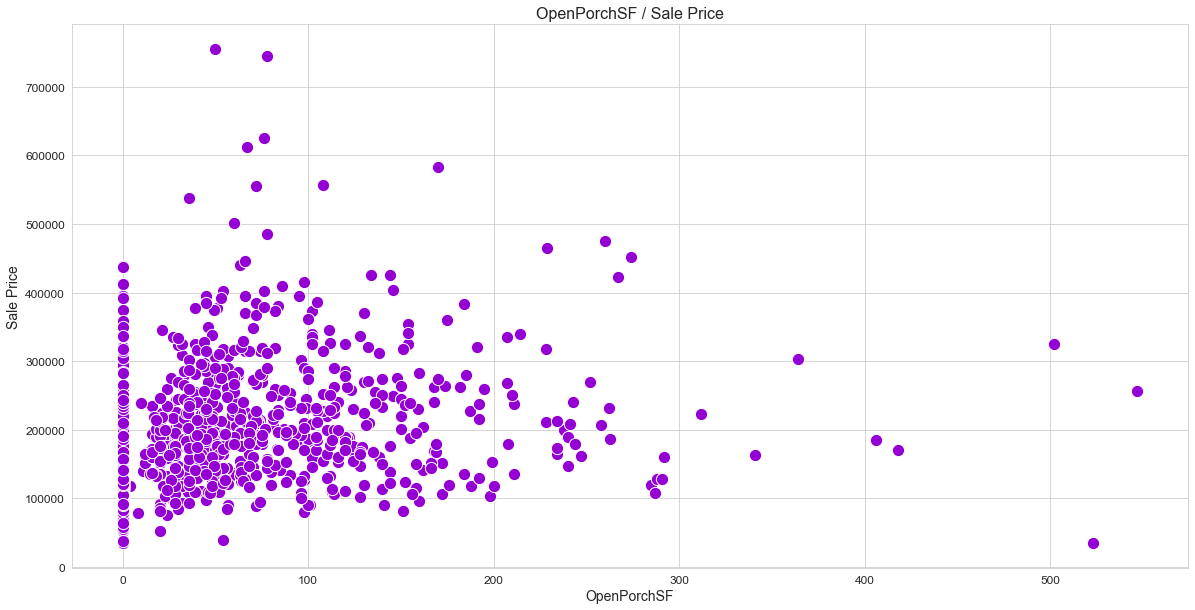

C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


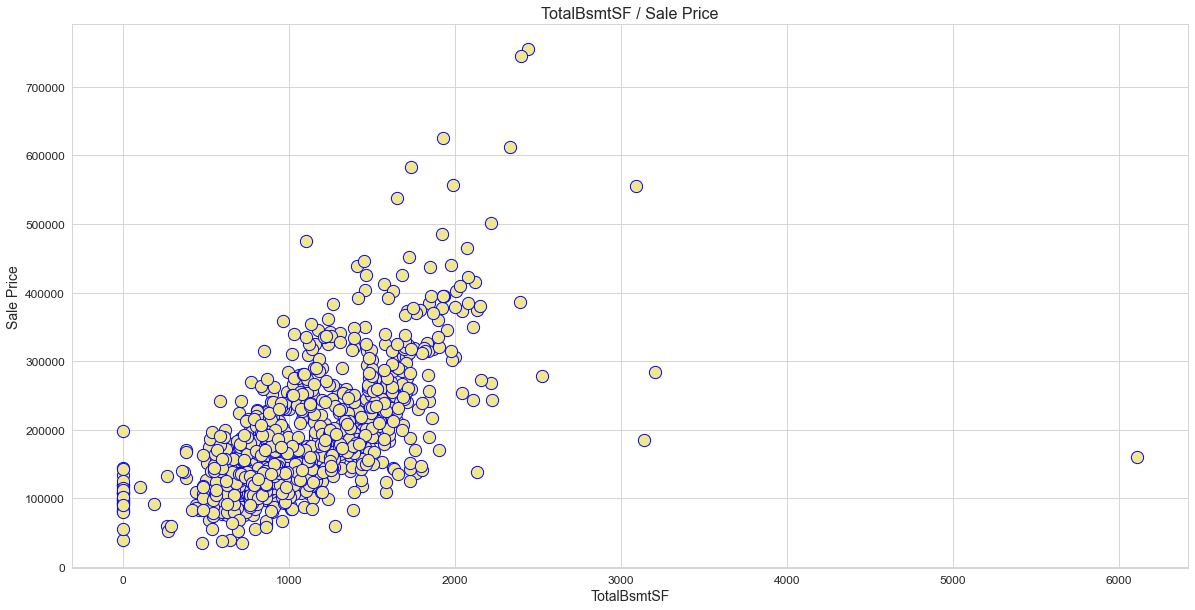

C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


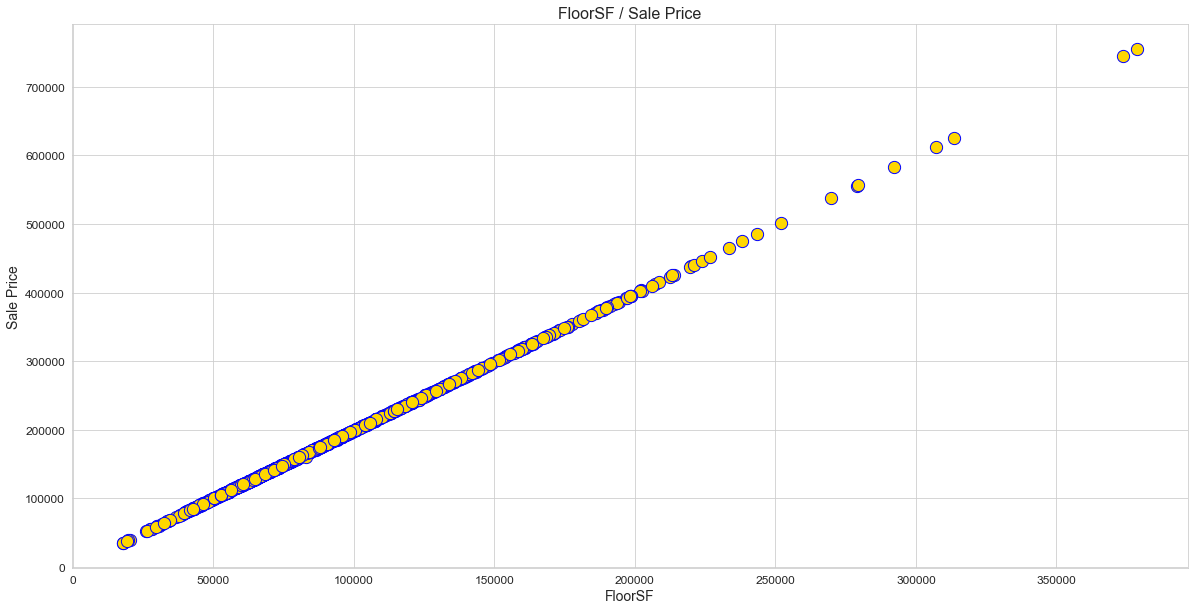

C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


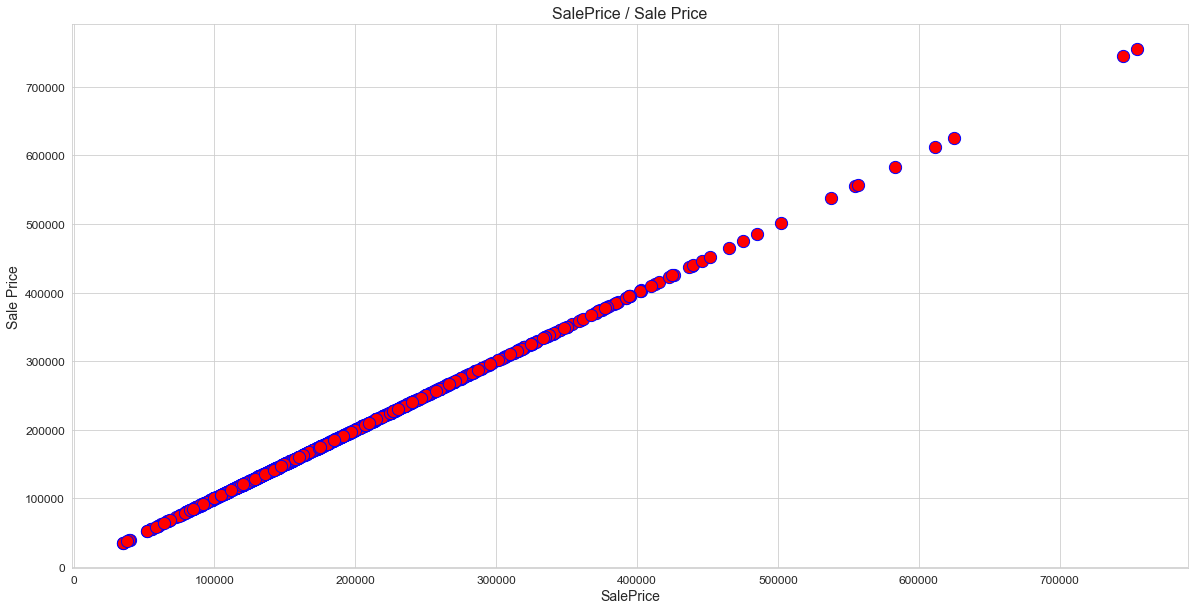

IndexError: index 9 is out of bounds for axis 0 with size 9

In [41]:
def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / Sale Price'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sb.scatterplot(i[5], y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} / Sale Price'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
    plot7 = sb.scatterplot(i[6], y_var, data = df, color = 'khaki', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter7.png')
    plt.show()
    
    plot8 = sb.scatterplot(i[7], y_var, data = df, color = 'gold', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[7]), fontsize = 16)
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter8.png')
    plt.show()
    
    plot9 = sb.scatterplot(i[8], y_var, data = df, color = 'r', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[8]), fontsize = 16)
    plt.xlabel('{}'.format(i[8]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter9.png')
    plt.show()
    
    plot10 = sb.scatterplot(i[9], y_var, data = df, color = 'deeppink', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[9]), fontsize = 16)
    plt.xlabel('{}'.format(i[9]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter10.png')
    plt.show()
    
scatter_df('SalePrice')

C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([0.e+00, 1.e-06, 2.e-06, 3.e-06, 4.e-06, 5.e-06, 6.e-06, 7.e-06,
        8.e-06, 9.e-06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

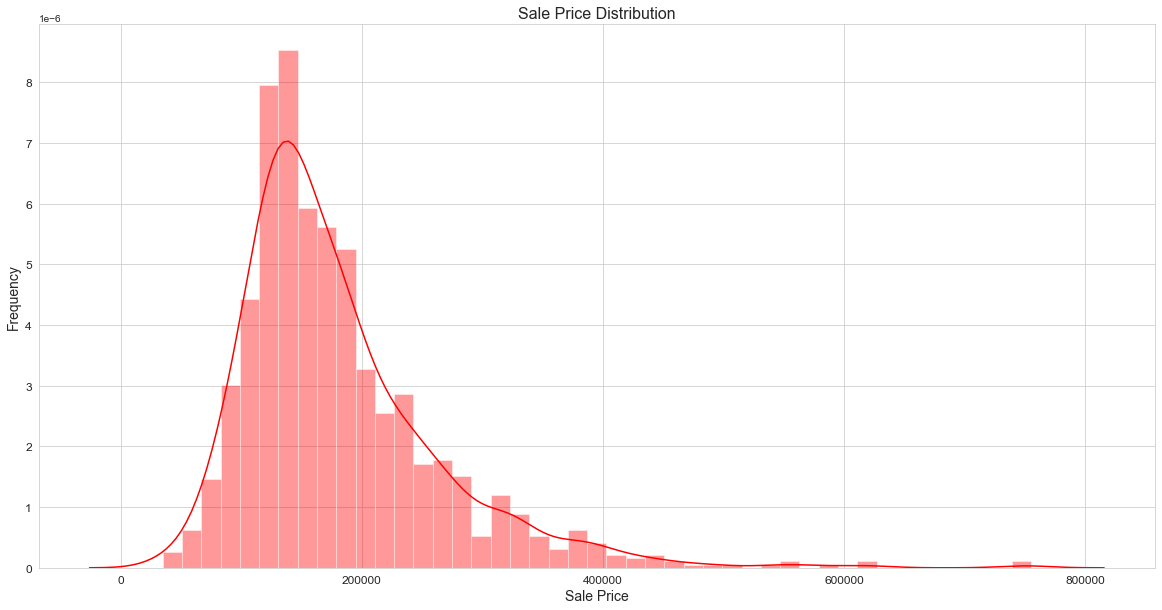

In [42]:
sb.distplot(df['SalePrice'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)



In [43]:
plt.savefig('distplot.png')
plt.show()

<Figure size 1440x720 with 0 Axes>

In [44]:
X_var = df[[ 'LotFrontage', 'OverallQual', 'WoodDeckSF', 'OpenPorchSF','TotalBsmtSF']].values
y_var = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

In [45]:
print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])


X_train samples :  [[  70    6  192    0 1059]
 [  66    6    0   66  806]
 [  60    5    0    0    0]
 [  60    7    0  341  880]
 [  60    6    0  158  684]]


In [46]:
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])


X_test samples :  [[  63    5    0    0  540]
 [  38    8  120   30 1260]
 [  60    5    0   50  384]
 [  94    7  288  195  845]
 [  59    7  240   56 1720]]


In [47]:
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])


y_train samples :  [154500 128000 107500 163000 114504]


In [48]:

print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

y_test samples :  [ 79000 245500 130000 260000 260400]


In [49]:
ols = LinearRegression()

In [50]:
ols.fit(X_train, y_train)


LinearRegression()

In [51]:
ols_yhat = ols.predict(X_test)

In [52]:
ridge = Ridge(alpha = 0.5)

In [104]:
ridge.fit(X_train, y_train)


Ridge(alpha=0.5)

In [54]:
ridge_yhat = ridge.predict(X_test)

In [58]:
lasso = Lasso(alpha = 0.01)

In [62]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [63]:
lasso_yhat = lasso.predict(X_test)

In [65]:
bayesian = BayesianRidge()

In [67]:
bayesian.fit(X_train, y_train)

BayesianRidge()

In [68]:
bayesian_yhat = bayesian.predict(X_test)

In [70]:
en = ElasticNet(alpha = 0.01)

In [74]:
en.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [75]:
en_yhat = en.predict(X_test)

In [76]:
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------


In [77]:
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

Explained Variance Score of OLS model is 0.7670184673612107
-------------------------------------------------------------------------------


In [84]:
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

Explained Variance Score of Ridge model is 0.7670751989341009
-------------------------------------------------------------------------------


In [87]:
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


Explained Variance Score of Lasso model is 0.7670184940715598
-------------------------------------------------------------------------------


In [88]:
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

Explained Variance Score of Bayesian model is 0.7679018196496895
-------------------------------------------------------------------------------


In [90]:
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

Explained Variance Score of ElasticNet is 0.7675554735167686
-------------------------------------------------------------------------------


In [91]:
print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------


In [95]:
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-Squared of OLS model is 0.7668043583953853
-------------------------------------------------------------------------------


In [96]:
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-Squared of Ridge model is 0.7668620779072763
-------------------------------------------------------------------------------


In [97]:
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-Squared of Lasso model is 0.7668043855794757
-------------------------------------------------------------------------------


In [99]:
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-Squared of Bayesian model is 0.767703106364301
-------------------------------------------------------------------------------


In [101]:
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-Squared of ElasticNet is 0.7673507205622393
-------------------------------------------------------------------------------
